In [2]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_records = 5000  # Number of transactions

# Generate random customer IDs (200 unique)
customer_ids = np.random.randint(1000, 1200, num_records)

# Generate random product IDs (50 unique)
product_ids = np.random.randint(200, 250, num_records)

# Product categories
categories = ["Electronics", "Clothing", "Home & Kitchen", "Sports", "Books"]
product_categories = np.random.choice(categories, num_records)

# Generate random order dates between Jan 1, 2023 - Dec 31, 2023
order_dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
order_dates = np.random.choice(order_dates, num_records)

# Generate random prices between $10 - $500
prices = np.round(np.random.uniform(10, 500, num_records), 2)

# Generate random quantities between 1 - 5
quantities = np.random.randint(1, 6, num_records)

# Generate return status (10% chance of return)
return_status = np.random.choice([0, 1], num_records, p=[0.9, 0.1])

# Create DataFrame
df = pd.DataFrame({
    "order_id": np.arange(1, num_records + 1),
    "customer_id": customer_ids,
    "product_id": product_ids,
    "category": product_categories,
    "order_date": order_dates,
    "price": prices,
    "quantity": quantities,
    "return_status": return_status
})

# Calculate total purchase value per transaction
df["total_value"] = df["price"] * df["quantity"]

# Save to CSV (optional)
# df.to_csv("ecommerce_transactions.csv", index=False)

print(df)


      order_id  customer_id  product_id        category order_date   price  \
0            1         1102         218        Clothing 2023-12-07  172.34   
1            2         1179         234          Sports 2023-08-01  255.21   
2            3         1092         203  Home & Kitchen 2023-07-07   16.99   
3            4         1014         204          Sports 2023-06-21  452.91   
4            5         1106         200        Clothing 2023-09-04   31.73   
...        ...          ...         ...             ...        ...     ...   
4995      4996         1198         216     Electronics 2023-08-09  273.73   
4996      4997         1194         226  Home & Kitchen 2023-01-10   26.36   
4997      4998         1108         232           Books 2023-04-30  207.68   
4998      4999         1046         245  Home & Kitchen 2023-05-03  483.49   
4999      5000         1083         216           Books 2023-09-04  367.88   

      quantity  return_status  total_value  
0            2    

In [4]:
top_customers = df.groupby("customer_id")["total_value"].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Total Spending:\n", top_customers)


Top 5 Customers by Total Spending:
 customer_id
1196    9884.03
1076    9082.55
1043    8546.83
1090    7606.10
1070    7430.46
Name: total_value, dtype: float64


In [5]:
top_products = df.groupby("product_id")["total_value"].sum().sort_values(ascending=False).head(3)
print("Top 3 Products by Revenue:\n", top_products)


Top 3 Products by Revenue:
 product_id
222    105540.23
212    100595.94
216     95845.68
Name: total_value, dtype: float64


In [6]:
most_frequent_customer = df["customer_id"].value_counts().idxmax()
purchase_count = df["customer_id"].value_counts().max()
print(f"Most Frequent Shopper: Customer {most_frequent_customer} with {purchase_count} purchases")


Most Frequent Shopper: Customer 1046 with 41 purchases


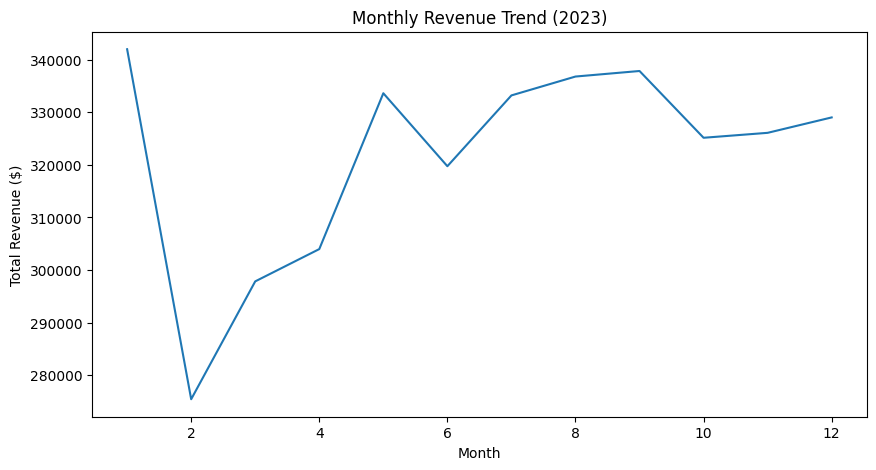

In [10]:
df["month"] = df["order_date"].dt.month
monthly_revenue = df.groupby("month")["total_value"].sum()

# Visualizing Revenue Trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker="o", linestyle="-", color="r")
plt.title("Monthly Revenue Trend (2023)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.grid()
plt.show()


In [13]:
returned_products = df[df["return_status"] == 1].groupby("product_id").size().sort_values(ascending=False).head(1)
print("Most Returned Product:\n", returned_products)


Most Returned Product:
 product_id
215    15
dtype: int64
